# 0.0 Data Prep

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

## Load the Data

In [3]:
df = pd.read_csv("coursework_fintech.csv")
print(df.shape)
df.head()

(11782, 18)


,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141592.0,2006.0,2007.0,8.0,814.0,3.0,management_in_trust,111.0,184.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1.0,1.0,1.0,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51327.0,1985.0,2007.0,8.0,587.0,8.0,self_management,80.0,76.0,2.0,2.0,Daegu,5.0,1.0,2.0,1.0,2.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Removing blank rows from the df
df = df.dropna()

# Removing string features from the df
df = df.drop("AptManageType", axis=1)
df = df.drop("SubwayStation", axis=1)

# Sorting the df by the year of sale
df = df.sort_values("YrSold", ascending=True)

df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park)
1,141592.0,2006.0,2007.0,8.0,814.0,3.0,111.0,184.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
171,36283.0,1992.0,2007.0,11.0,355.0,4.0,200.0,0.0,5.0,10.0,7.0,1.0,1.0,1.0,5.0,1.0
169,194690.0,1993.0,2007.0,11.0,2337.0,18.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
167,172566.0,1993.0,2007.0,11.0,1761.0,4.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
165,86725.0,1993.0,2007.0,11.0,644.0,15.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0


In [5]:
# Defining the target
target = df["SalePrice"]

# Defining the features
features = df.drop("SalePrice", axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [6]:
target.head()

1      141592.0
171     36283.0
169    194690.0
167    172566.0
165     86725.0
Name: SalePrice, dtype: float64

In [7]:
features.head()

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park)
1,2006.0,2007.0,8.0,814.0,3.0,111.0,184.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
171,1992.0,2007.0,11.0,355.0,4.0,200.0,0.0,5.0,10.0,7.0,1.0,1.0,1.0,5.0,1.0
169,1993.0,2007.0,11.0,2337.0,18.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
167,1993.0,2007.0,11.0,1761.0,4.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
165,1993.0,2007.0,11.0,644.0,15.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0


# 1.0 Testing Hyperparaneters

## Decision Tree Regression

In [7]:
# Testing the effect of max depth
max_depth = [i for i in range(2, 22)]
ms_errors_1 = []

for i in max_depth:
    # Creating the tree regressor object
    DTR_HP = DecisionTreeRegressor(max_depth=i)

    # Fitting the tree regressor to the training data
    DTR_HP.fit(x_train, y_train)

    # Making predictions on the test data
    DTR_HP_y_pred = DTR_HP.predict(x_test)

    # Evaluating the model using mean squared error and root mean squared error
    DTR_HP_mse = mean_squared_error(y_test, DTR_HP_y_pred)
    ms_errors_1.append(DTR_HP_mse)

In [8]:
# Testing the effect of sample split
min_samples_split = [i+2 for i in range(20)]
ms_errors_2 = []

for i in min_samples_split:
    # Creating the tree regressor object
    DTR_HP = DecisionTreeRegressor(min_samples_split=i)

    # Fitting the tree regressor to the training data
    DTR_HP.fit(x_train, y_train)

    # Making predictions on the test data
    DTR_HP_y_pred = DTR_HP.predict(x_test)

    # Evaluating the model using mean squared error and root mean squared error
    DTR_HP_mse = mean_squared_error(y_test, DTR_HP_y_pred)
    ms_errors_2.append(DTR_HP_mse)

In [9]:
# Testing the effect of sample leaves
min_samples_leaf = [i+2 for i in range(20)]
ms_errors_3 = []

for i in min_samples_leaf:
    # Creating the tree regressor object
    DTR_HP = DecisionTreeRegressor(min_samples_leaf=i)

    # Fitting the tree regressor to the training data
    DTR_HP.fit(x_train, y_train)

    # Making predictions on the test data
    DTR_HP_y_pred = DTR_HP.predict(x_test)

    # Evaluating the model using mean squared error and root mean squared error
    DTR_HP_mse = mean_squared_error(y_test, DTR_HP_y_pred)
    ms_errors_3.append(DTR_HP_mse)

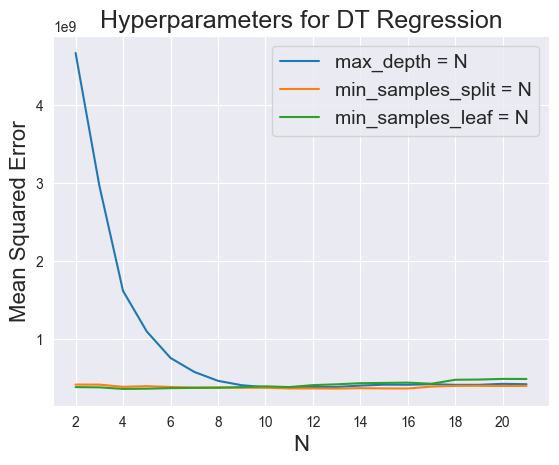

In [10]:
# Plotting the test data
ms_errors = pd.DataFrame({"max_depth": ms_errors_1, "min_samples_split": ms_errors_2, "min_samples_leaf": ms_errors_3}, index=range(2, 22))

plt.plot(ms_errors)

plt.title("Hyperparameters for DT Regression", fontsize=18)
plt.xlabel("N", fontsize=16)
plt.xticks(ms_errors.index[::2])
plt.ylabel("Mean Squared Error", fontsize=16)

legend_labels = [f"{col} = N" for col in ms_errors.columns]
plt.legend(labels=legend_labels, fontsize=14)

## Gradient Boosting Regression

In [16]:
# Testing the effect of max leaf nodes
max_leaf_nodes = [i for i in range(2, 22)]
ms_errors_1 = []

for i in max_leaf_nodes:
    # Creating the tree regressor object
    GB_HP = GradientBoostingRegressor(max_leaf_nodes=i)

    # Fitting the tree regressor to the training data
    GB_HP.fit(x_train, y_train)

    # Making predictions on the test data
    GB_HP_y_pred = GB_HP.predict(x_test)

    # Evaluating the model using mean squared error and root mean squared error
    GB_HP_mse = mean_squared_error(y_test, GB_HP_y_pred)
    ms_errors_1.append(GB_HP_mse)

In [17]:
# Testing the effect of learning rate
learning_rate = [(i/100) for i in range(2, 22)]
ms_errors_2 = []

for i in learning_rate:
    # Creating the tree regressor object
    GB_HP = GradientBoostingRegressor(learning_rate=i)

    # Fitting the tree regressor to the training data
    GB_HP.fit(x_train, y_train)

    # Making predictions on the test data
    GB_HP_y_pred = GB_HP.predict(x_test)

    # Evaluating the model using mean squared error and root mean squared error
    GB_HP_mse = mean_squared_error(y_test, GB_HP_y_pred)
    ms_errors_2.append(GB_HP_mse)

In [18]:
# Testing the effect of n estimators
n_estimators = [(i*10) for i in range(2, 22)]
ms_errors_3 = []

for i in n_estimators:
    # Creating the tree regressor object
    GB_HP = GradientBoostingRegressor(n_estimators=i)

    # Fitting the tree regressor to the training data
    GB_HP.fit(x_train, y_train)

    # Making predictions on the test data
    GB_HP_y_pred = GB_HP.predict(x_test)

    # Evaluating the model using mean squared error and root mean squared error
    GB_HP_mse = mean_squared_error(y_test, GB_HP_y_pred)
    ms_errors_3.append(GB_HP_mse)

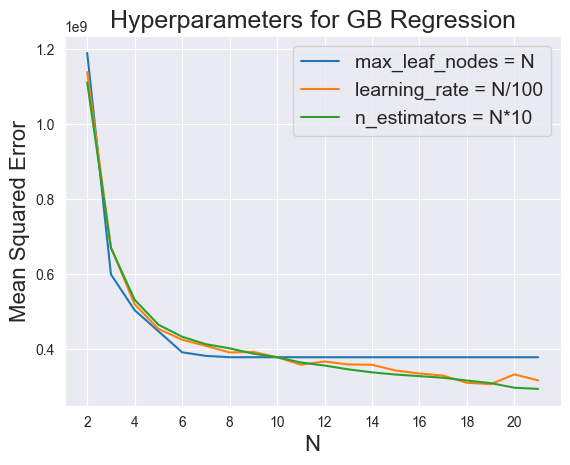

In [19]:
# Plotting the test data
ms_errors = pd.DataFrame({"max_leaf_nodes": ms_errors_1, "learning_rate": ms_errors_2, "n_estimators": ms_errors_3}, index=range(2, 22))

plt.plot(ms_errors)

plt.title("Hyperparameters for GB Regression", fontsize=18)
plt.xlabel("N", fontsize=16)
plt.xticks(ms_errors.index[::2])
plt.ylabel("Mean Squared Error", fontsize=16)

legend_labels = [f"{ms_errors.columns[0]} = N", f"{ms_errors.columns[1]} = N/100", f"{ms_errors.columns[2]} = N*10"]
plt.legend(labels=legend_labels, fontsize=14)

# 2.0 Optimised Hyperparameters

## Dummy Regressor

In [7]:
# Creating a dummy regressor object
dummy_regressor = DummyRegressor(strategy="mean")

# Fitting the dummy regressor to the training data
dummy_regressor.fit(x_train, y_train)

# Making predictions on the test data
dummy_y_pred = dummy_regressor.predict(x_test)

# Evaluating the model using mean squared error and root mean squared error
dummy_mse = mean_squared_error(y_test, dummy_y_pred)
dummy_rmse = np.sqrt(dummy_mse)
dummy_mae = mean_absolute_error(y_test, dummy_y_pred)

print("Root Mean Squared Error: {:.2f}".format(dummy_rmse))
print("Mean squared error: ", dummy_mse)
print("Mean absolute error: {:.2f}".format(dummy_mae))

Root Mean Squared Error: 106339.98
Mean squared error:  11308191453.783167
Mean absolute error: 88208.00


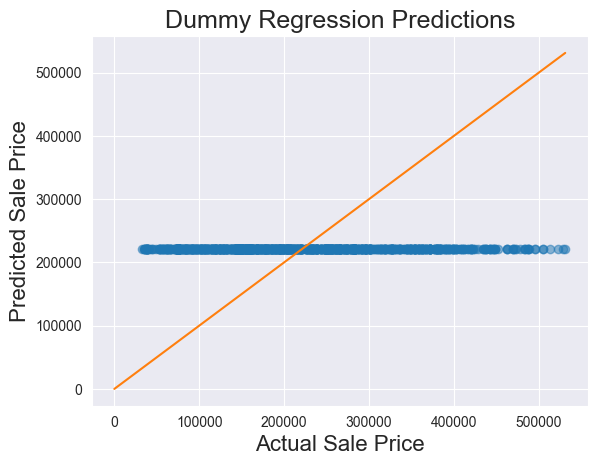

In [8]:
# Scatter plot for predicted vs actual sale prices
plt.scatter(y_test, dummy_y_pred, alpha=0.5, c="tab:blue")

# Labels and title
plt.xlabel("Actual Sale Price", fontsize=16)
plt.ylabel("Predicted Sale Price", fontsize=16)
plt.title("Dummy Regression Predictions", fontsize=18)

# Diagonal line for reference, close to the line = accurate
plt.plot([0, max(y_test)], [0, max(y_test)], "-", color="tab:orange")

# Show the plot
plt.show()

## Decision Tree Regression

In [15]:
# Create the tree regressor object
tree_regressor = DecisionTreeRegressor()

# Defining the hyperparameter grid
tree_param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "auto", "sqrt"],
    "random_state": [0],
    "max_leaf_nodes": [None, 5, 10],
    "criterion": ["squared_error", "mae"],
    "splitter": ["best", "random"],
}

# Creating the grid search object
tree_grid_search = GridSearchCV(tree_regressor, tree_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Trainning the grid search object on the training data
tree_grid_search.fit(x_train, y_train)

# Getting the best parameters and best estimator from the grid search object
tree_best_params = tree_grid_search.best_params_
tree_best_estimator = tree_grid_search.best_estimator_

# Making predictions on the test data using the best estimator
tree_y_pred = tree_best_estimator.predict(x_test)

# Calculate mean squared error, root mean squared error, and mean absolute error
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, tree_y_pred)

print("Root Mean Squared Error: {:.2f}".format(tree_rmse))
print("Mean squared error: {:.2f}".format(tree_mse))
print("Mean absolute error: {:.2f}".format(tree_mae))
print("Best parameters: ", tree_best_params)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Root Mean Squared Error: 18972.65
Mean squared error: 359961369.72
Mean absolute error: 11974.15
Best parameters:  {'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 0, 'splitter': 'best'}


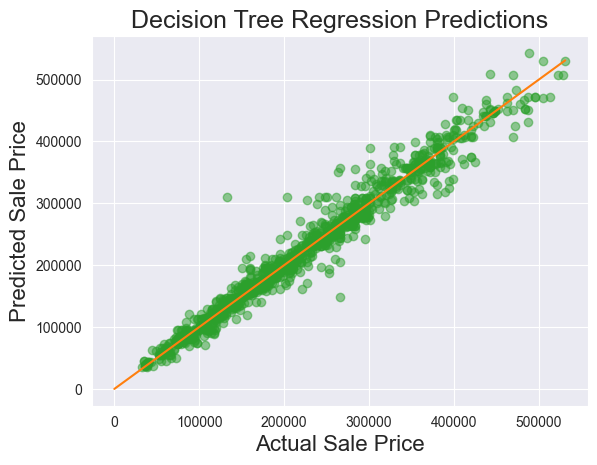

In [35]:
# Scatter plot for predicted vs actual sale prices
plt.scatter(y_test, tree_y_pred, alpha=0.5, c="tab:green")


# Labels and title
plt.xlabel("Actual Sale Price", fontsize=16)
plt.ylabel("Predicted Sale Price", fontsize=16)
plt.title("Decision Tree Regression Predictions", fontsize=18)

# Diagonal line for reference, close to the line = accurate
plt.plot([0, max(y_test)], [0, max(y_test)], "-", color="tab:orange")

# Show the plot
plt.show()

## Gradient Boosting Regression

In [27]:
# Create the tree regressor object
GB_regressor = GradientBoostingRegressor()

# Defining the hyperparameter grid
GB_param_grid = {
    "max_depth": [10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [2, 4],
    "max_features": [None, "auto", "sqrt"],
    "random_state": [0],
    "max_leaf_nodes": [None, 5, 10],
    "criterion": ["squared_error", "friedman_mse"],
    "learning_rate": [0.01, 0.1, 0.5],
    "loss": ["squared_error", "absolute_error"],
    "n_estimators": [50, 100, 250]
}

# Creating the grid search object
GB_grid_search = GridSearchCV(GB_regressor, GB_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)

# Trainning the grid search object on the training data
GB_grid_search.fit(x_train, y_train)

# Getting the best parameters and best estimator from the grid search object
GB_best_params = GB_grid_search.best_params_
GB_best_estimator = GB_grid_search.best_estimator_

# Making predictions on the test data using the best estimator
GB_y_pred = GB_best_estimator.predict(x_test)

# Calculate mean squared error, root mean squared error, and mean absolute error
GB_mse = mean_squared_error(y_test, GB_y_pred)
GB_rmse = np.sqrt(GB_mse)
GB_mae = mean_absolute_error(y_test, GB_y_pred)

print("Root Mean Squared Error: {:.2f}".format(GB_rmse))
print("Mean squared error: {:.2f}".format(GB_mse))
print("Mean absolute error: {:.2f}".format(GB_mae))
print("Best parameters: ", GB_best_params)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
Root Mean Squared Error: 15856.95
Mean squared error: 251442910.57
Mean absolute error: 10240.19
Best parameters:  {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250, 'random_state': 0}


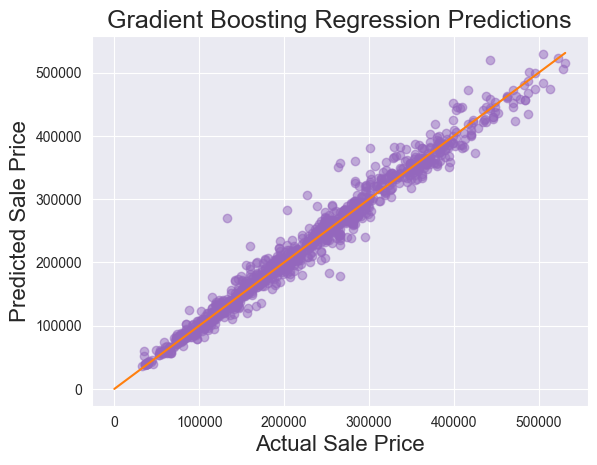

In [36]:
# Scatter plot for predicted vs actual sale prices
plt.scatter(y_test, GB_y_pred, alpha=0.5, c="tab:purple")

# Labels and title
plt.xlabel("Actual Sale Price", fontsize=16)
plt.ylabel("Predicted Sale Price", fontsize=16)
plt.title("Gradient Boosting Regression Predictions", fontsize=18)

# Diagonal line for reference, close to the line = accurate
plt.plot([0, max(y_test)], [0, max(y_test)], "-", color="tab:orange")

# Show the plot
plt.show()

# 4.0 Training Loss

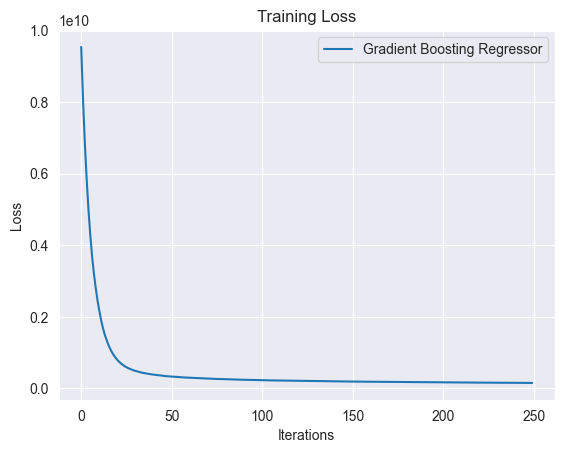

In [26]:
# create a figure and axis object
fig, ax = plt.subplots()

# plot the training loss for each method
#ax.plot(tree_regressor.loss_curve_, label='Decision Tree Regressor')
ax.plot(GB_best_estimator.train_score_, label='Gradient Boosting Regressor')

# set the title and axis labels
ax.set_title('Training Loss')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')

# add a legend and show the plot
ax.legend()
plt.show()
